In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path0 = r'E:\netData\SciSciNet\2000-2015\paper2000-2015.tsv.zip'
path1 = r'E:\netData\SciSciNet\2000-2015\matchedNIH2000-2015.tsv.zip'
path2 = r'E:\netData\SciSciNet\2000-2015\matchedNSF2000-2015.tsv.zip'

In [3]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

C:\Users\nd\AppData\Local\Temp\ipykernel_14284\297883942.py:1: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path1)


# Fig 3

In [4]:
df1.columns

Index(['PaperID', 'Year', 'FieldID', 'JournalID', 'Reference_Count', 'C_f',
       'C5', 'Team_Size', 'Disruption', 'Atyp_10pct_Z', 'Atyp_Pairs',
       'Atyp_Median_Z', 'Patent_Count', 'Newsfeed_Count', 'Tweet_Count',
       'NCT_Count', 'Patent', 'Newsfeed', 'Tweet', 'NCT', 'Institution_Count',
       'NIH_Count', 'NSF_Count', 'Volume', 'Issue', 'FirstPage', 'LastPage',
       'NIH', 'NSF', 'PageLength'],
      dtype='object')

In [5]:
df1['NIHlabel'] = df1['NIH'].map({0:'Control',1:"NIH"})
df2['NSFlabel'] = df2['NSF'].map({0:'Control',1:"NSF"})

In [6]:
df1['NC'] = df1['C_f']
df1['CP'] = df1['Patent_Count']
df1['-10 Novelty'] = df1['Atyp_10pct_Z']*(-1)
df1['-M Novelty'] = df1['Atyp_Median_Z']*(-1)

In [7]:
df2['NC'] = df2['C_f']
df2['CP'] = df2['Patent_Count']
df2['-10 Novelty'] = df2['Atyp_10pct_Z']*(-1)
df2['-M Novelty'] = df2['Atyp_Median_Z']*(-1)

In [8]:
markerslst = [{'Control':'o','NIH':"D"} , {'Control':'o','NSF':"^"}]
palettelst = [['#196F3D','#922B21'] , ['#1F618D','#922B21']]
huelst = ['NIHlabel' , 'NSFlabel']
jlst = ['C5','NC','CP','-10 Novelty','-M Novelty','Disruption']
dflst = [df1 , df2]

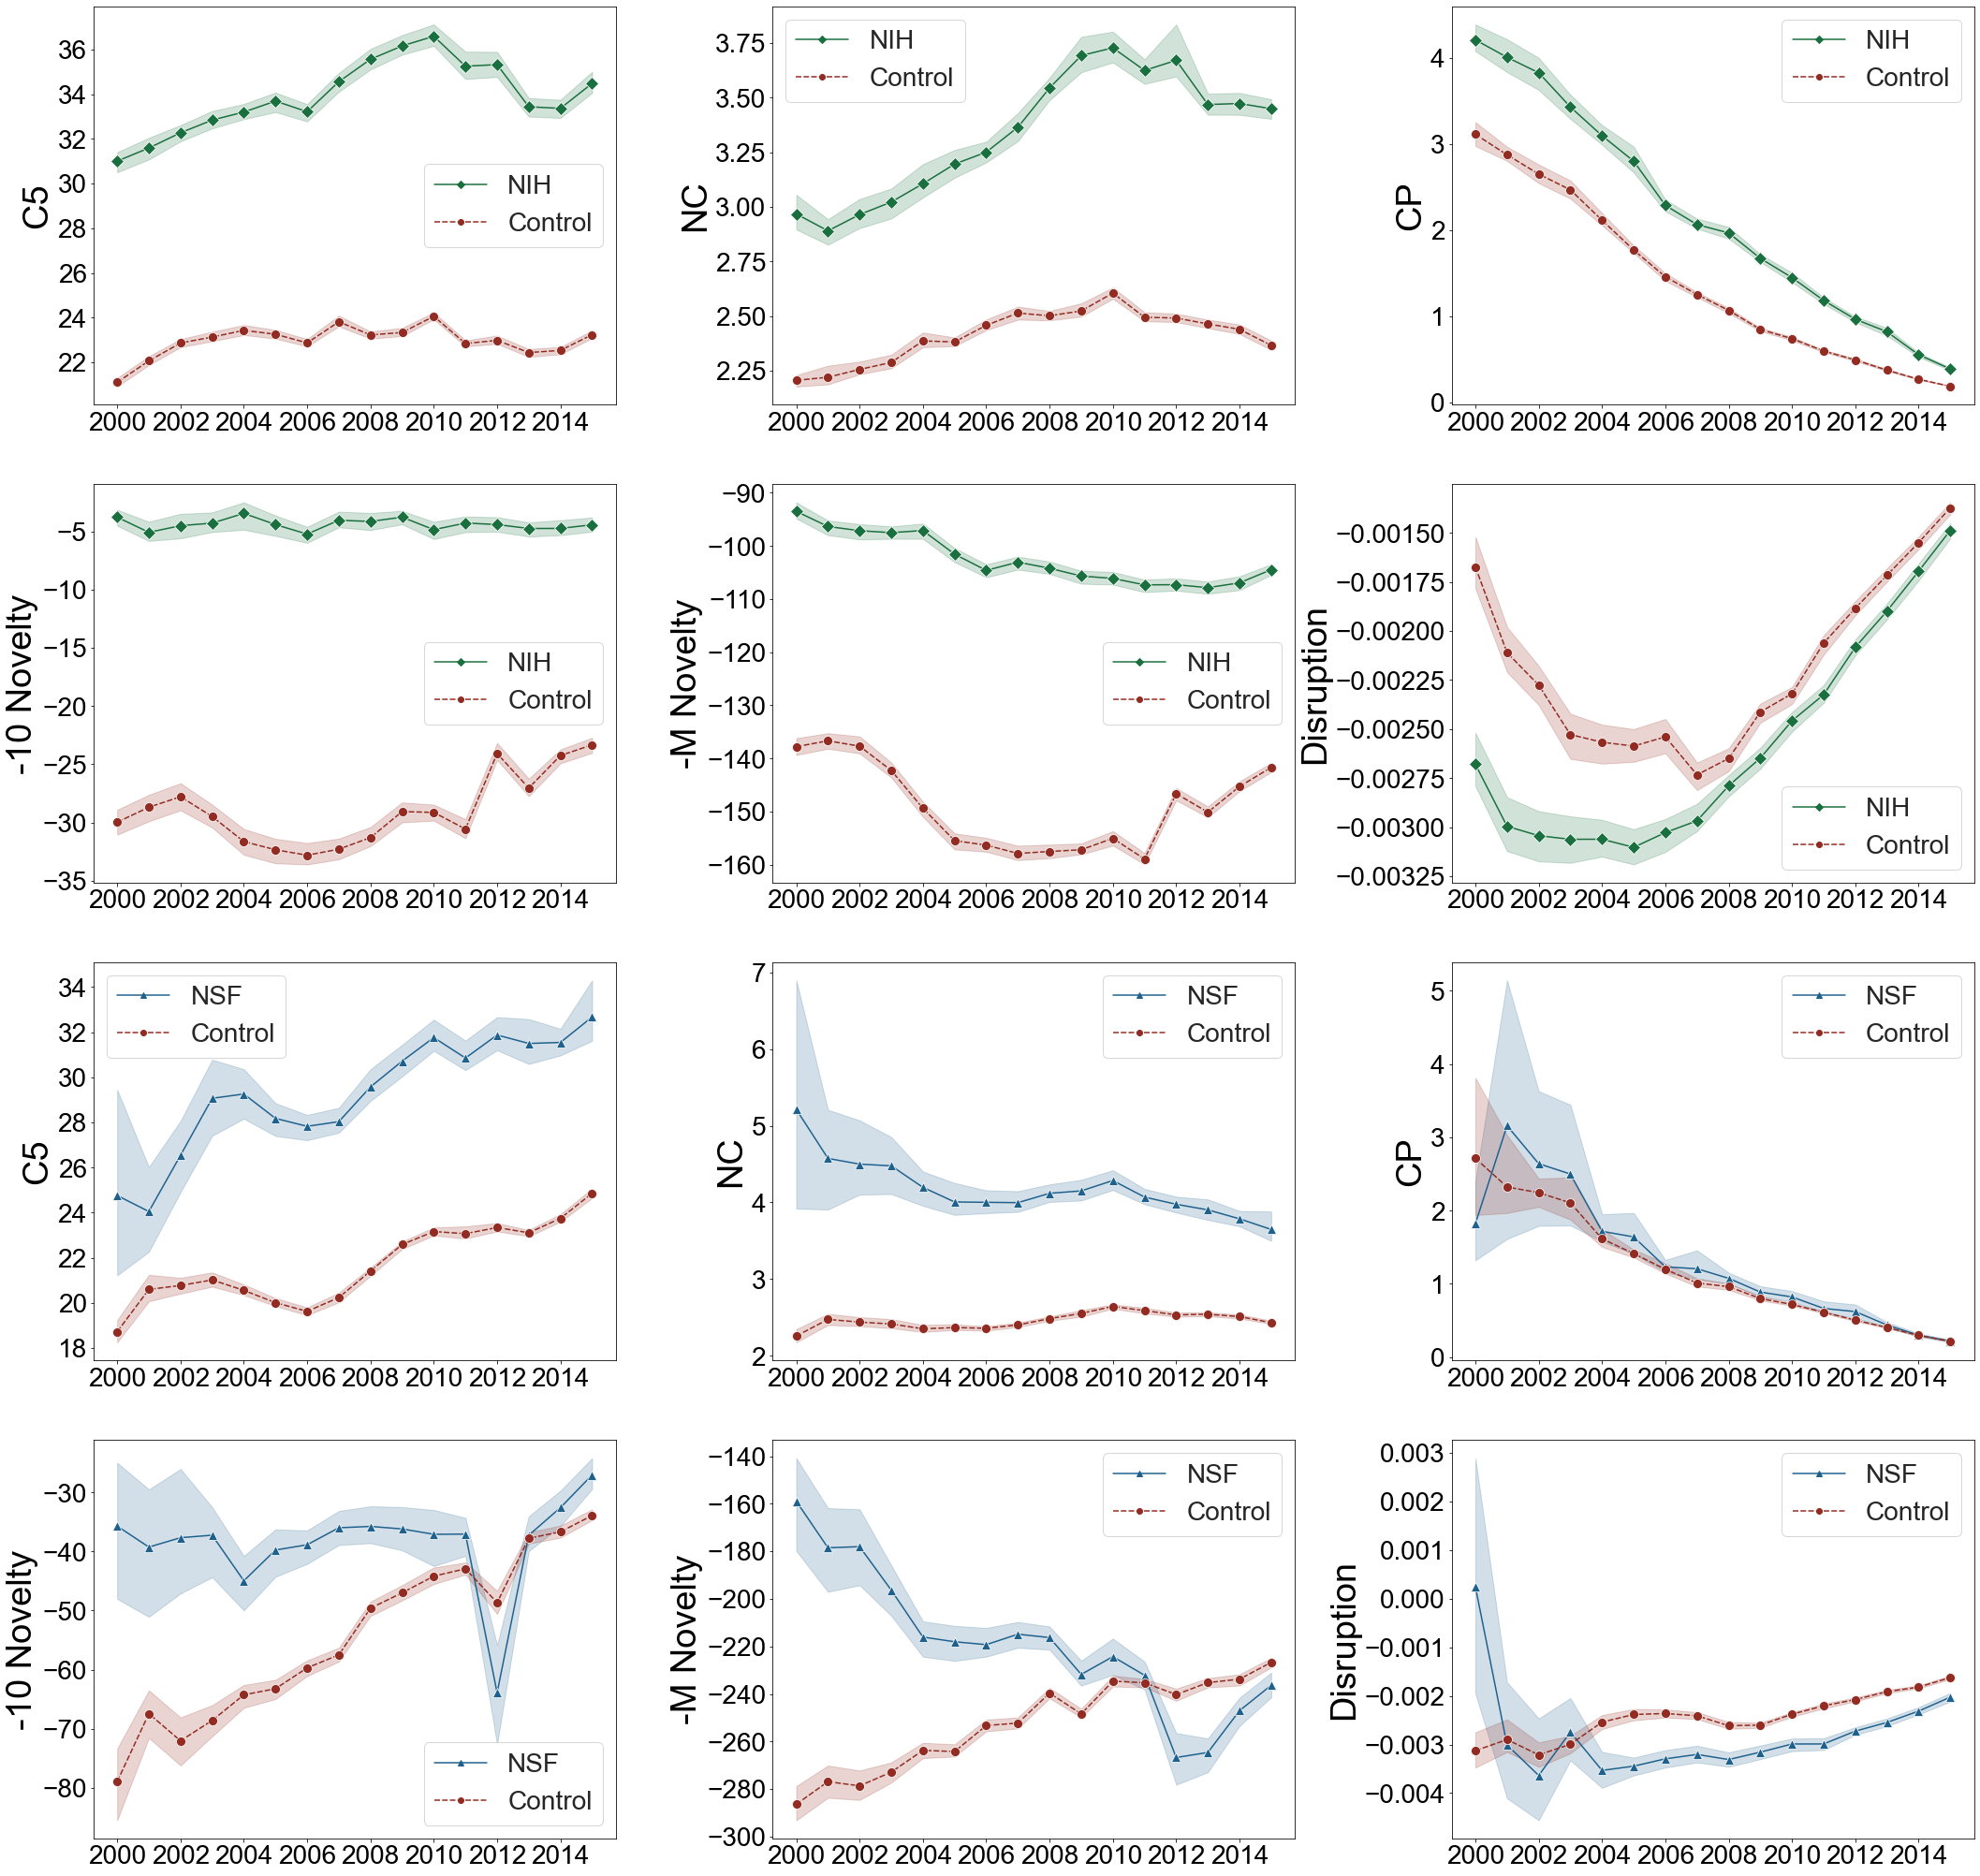

In [9]:
plt.subplots(4,3,figsize=(36,36))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.2)
sns.set_theme(style="ticks")

for i in range(2):
    for j in range(6):
        ax = plt.subplot(4, 3, i*6+j+1)
        sns.lineplot(data=dflst[i], x='Year', y=jlst[j],hue = huelst[i], style=huelst[i], sort=True,markers = markerslst[i],markersize = 10,n_boot=100, palette=palettelst[i])
        plt.legend(fontsize = 28 )
        plt.yticks(size = 28)
        plt.xticks(size = 28)
        plt.xlabel('',fontsize = 0)
        plt.ylabel(jlst[j],fontsize = 38)

plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 3\0.pdf",bbox_inches = 'tight')

Text(0, 0.5, 'C5')

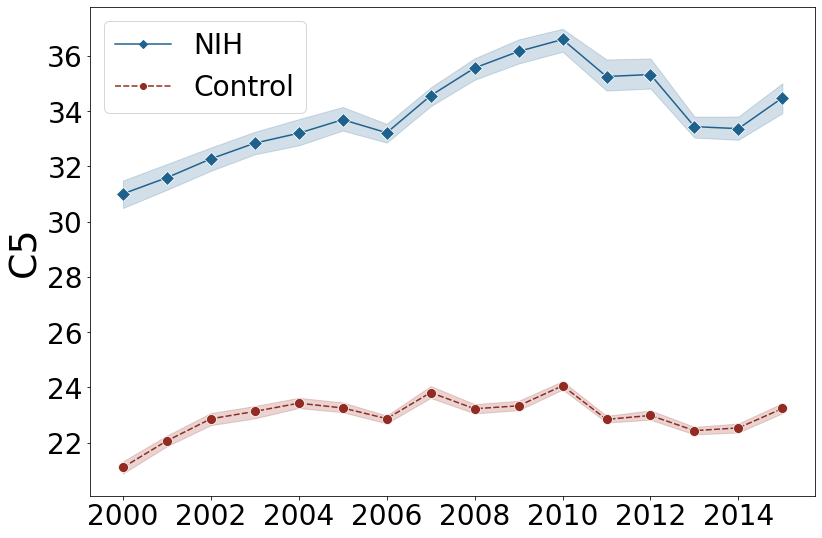

In [6]:
f, ax = plt.subplots(figsize=(13, 9))
sns.lineplot(data=df1, x='Year', y='C5',hue = 'NIHlabel', style='NIHlabel', sort=True,markers = {'Control':'o','NIH':"D"},markersize = 10,n_boot=100, palette=['#1F618D','#922B21'])
plt.legend(fontsize = 28 )
plt.yticks(size = 28)
plt.xticks(size = 28)
plt.xlabel('',fontsize = 0)
plt.ylabel('C5',fontsize = 38)

# B

In [10]:
dfField = pd.read_csv(r'E:\netData\SciSciNet\data\SciSciNet_Fields.tsv' , sep = '\t')
dfField = dfField[dfField['Field_Type']!='Sub']

In [97]:
x = [i for i in range(19*3)]
x1 = x[: :3]
x2 = x[1: :3]

In [106]:
def get_d(v , df):
    dlst1 = []
    stdlst1 = []
    dlst2 = []
    stdlst2 = []
    plst = []
    for i in range(19):
        fieldid = dfField['FieldID'].values[i]
        d1 = df.loc[(df['FieldID'] == fieldid) & (df['NIH'] != 0) , v]
        dlst1.append(np.mean(d1))
        stdlst1.append(np.std(d1)*len(d1)**-0.5)
        d2 = df.loc[(df['FieldID'] == fieldid) & (df['NIH'] == 0) , v]
        dlst2.append(np.mean(d2))
        stdlst2.append(np.std(d2)*len(d2)**-0.5)
        plst.append(scipy.stats.mannwhitneyu(d1 , d2, alternative='two-sided')[-1])
    xticks = []
    m = 0
    for i in x:
        if i%3 == 1:
            xticks.append(dfField['Field_Name'].values[m])
            m += 1
        else:
            xticks.append('')
    return dlst1 , stdlst1 , dlst2 , stdlst2 , plst, xticks

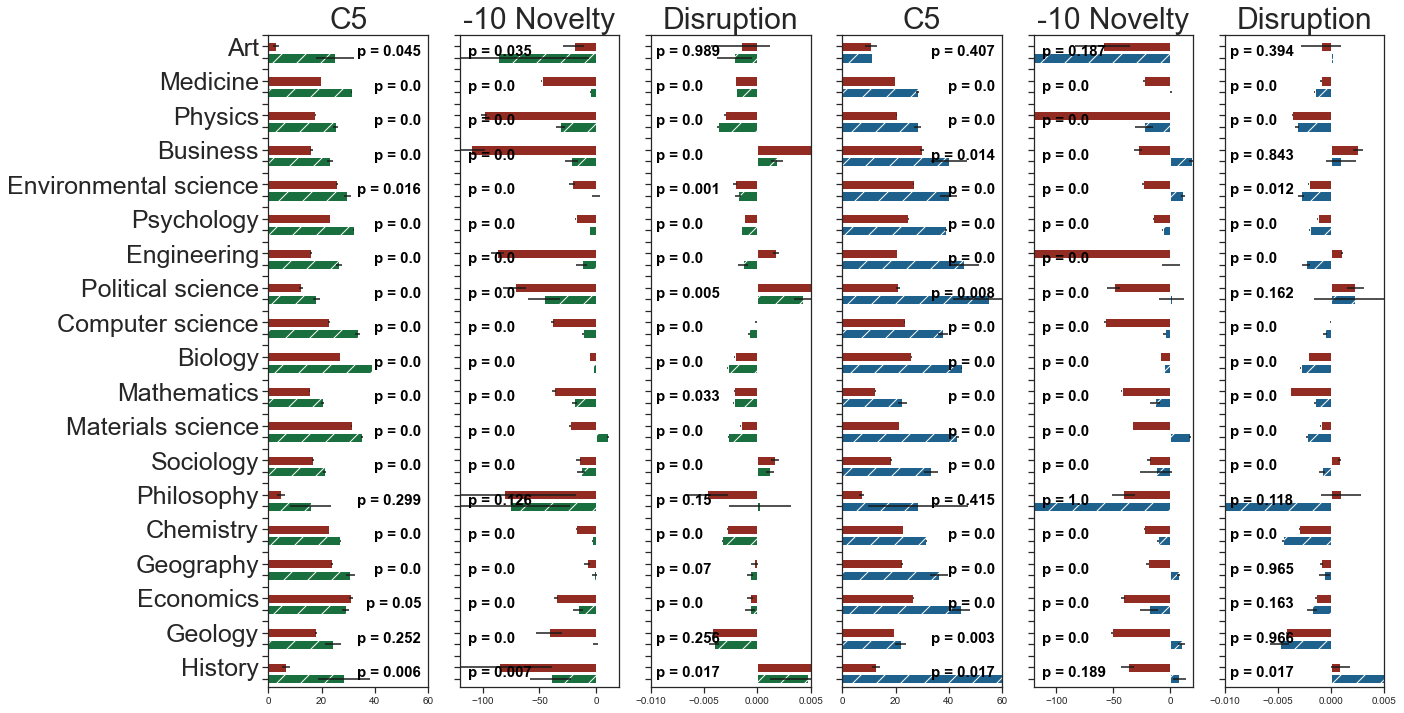

In [113]:
plt.subplots(1,6,figsize=(20,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2)

for j in range(2):
    df = dflst[j]
    palette = palettelst[j]
    for i in range(3):
        v = ['C5' , '-10 Novelty' , 'Disruption'][i]
        dlst1 , stdlst1 , dlst2 , stdlst2 , plst, xticks = get_d(v , df)

        ax = plt.subplot(1,6,j*3 + i + 1)
        plt.barh(x1, dlst1, xerr=stdlst1,color = palette[0],hatch = '/')
        plt.barh(x2, dlst2, xerr=stdlst2,color = palette[1])

        if i == 0:
            for _ in range(19):
                text = ax.text(57.5, _*3+0.5, 'p = '+str(np.round(plst[_], 3)),
                                       ha="right", va="center", color="black", fontsize=15, fontweight='bold')  
        elif i == 1:
            for _ in range(19):
                text = ax.text(-113, _*3+0.5, 'p = '+str(np.round(plst[_], 3)),
                               ha="left", va="center", color="black", fontsize=15, fontweight='bold')
        elif i == 2:
            for _ in range(19):
                text = ax.text(-0.0095, _*3+0.5, 'p = '+str(np.round(plst[_], 3)),
                               ha="left", va="center", color="black", fontsize=15, fontweight='bold')  
        plt.ylim((-0.75,len(x)-1.25))
        
        if i ==0:
            plt.xlim((0,60))
        if i ==1:
            plt.xlim((-120,20))
        if i ==2:
            plt.xlim((-0.01,0.005))
        if i ==0 and j == 0:
            plt.yticks(x , xticks, fontsize = 25)
        else:
            plt.yticks(x,['']*len(x), fontsize = 0)

        plt.xticks(size = 10)
        plt.title(v,fontsize = 30)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 4\0.pdf",bbox_inches = 'tight')

In [80]:
dlst1 = []
stdlst1 = []
dlst2 = []
stdlst2 = []

plst = []
for i in range(19):
    fieldid = dfField['FieldID'].values[i]
    d1 = df1.loc[(df1['FieldID'] == fieldid) & (df1['NIH'] != 0) , 'C5']
    dlst1.append(np.mean(d1))
    stdlst1.append(np.std(d1)*len(d1)**-0.5)
    d2 = df1.loc[(df1['FieldID'] == fieldid) & (df1['NIH'] == 0) , 'C5']
    dlst2.append(np.mean(d2))
    stdlst2.append(np.std(d2)*len(d2)**-0.5)
    plst.append(scipy.stats.mannwhitneyu(d1 , d2, alternative='two-sided')[-1])
    
xticks = []
m = 0
for i in x:
    if i%3 == 1:
        xticks.append(dfField['Field_Name'].values[m])
        m += 1
    else:
        xticks.append('')

Text(0.5, 1.0, 'C5')

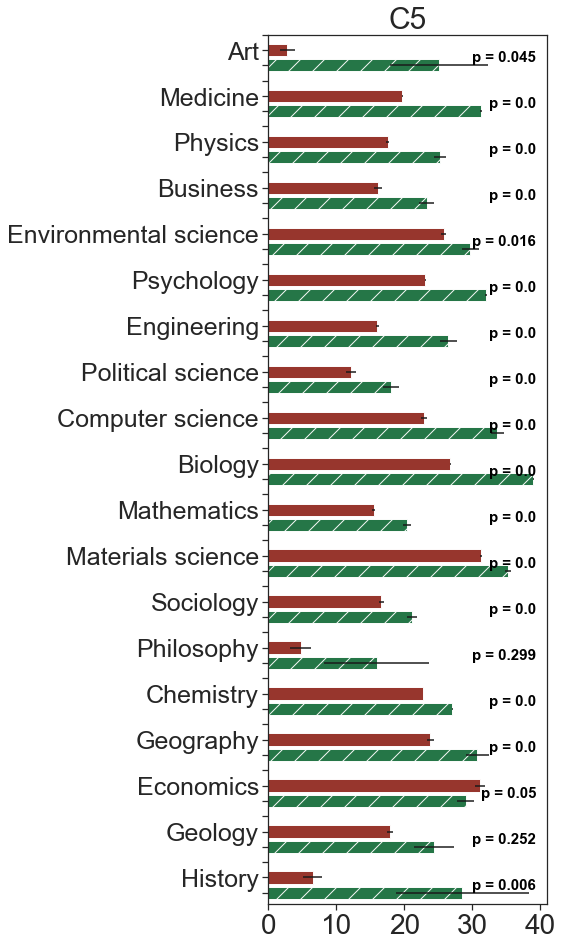

In [96]:
f, ax = plt.subplots(figsize=(5, 16))

plt.barh(x1, dlst1, xerr=stdlst1,color = '#196F3D',alpha = 0.95,hatch = '/')
plt.barh(x2, dlst2, xerr=stdlst2,color = '#922B21',alpha = 0.95)
for _ in range(19):
    text = ax.text(max(dlst1 + dlst2)*1.01, _*3+0.5, 'p = '+str(np.round(plst[_], 3)),
                           ha="right", va="center", color="black", fontsize=15, fontweight='bold')  
plt.ylim((-0.75,len(x)-1.25))
plt.yticks(x , xticks, fontsize = 25)
plt.xticks(size = 28)
plt.title(r'C5',fontsize = 30)

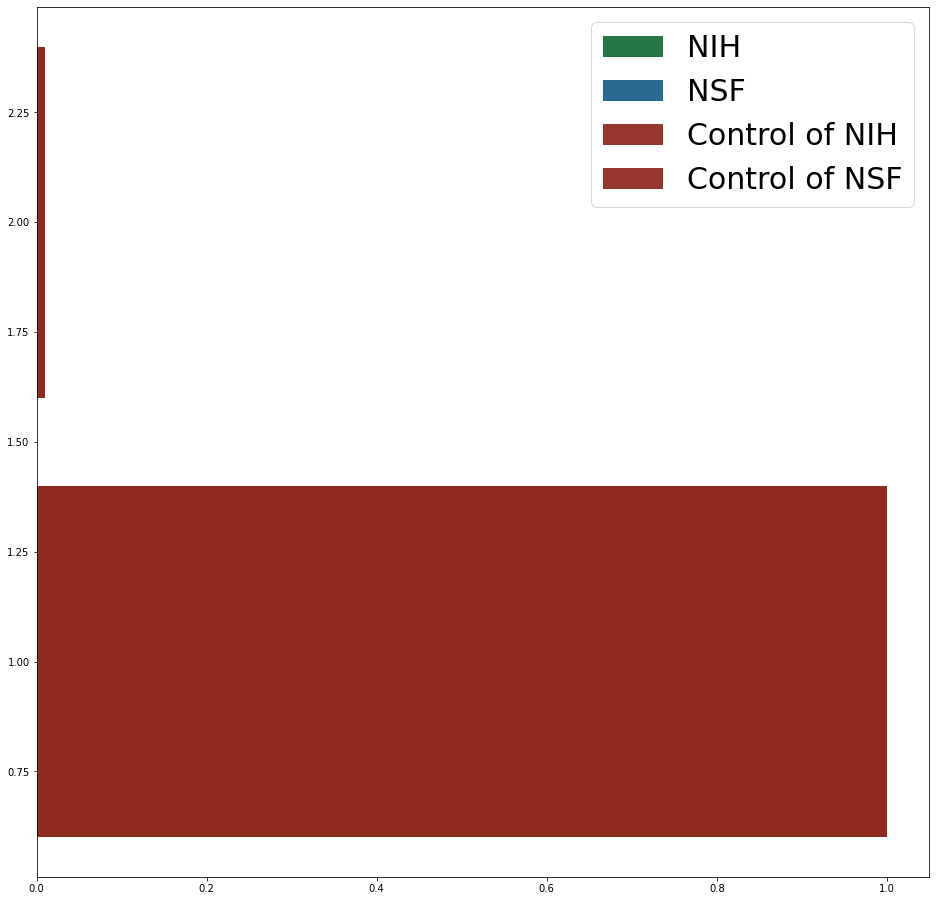

In [4]:
f, ax = plt.subplots(figsize=(16, 16))

plt.barh([1,2], [1,.01],color = '#196F3D',alpha = 0.95,label = 'NIH')
plt.barh([1,2], [1,.01],color = '#1F618D',alpha = 0.95,label = 'NSF')
plt.barh([1,2], [1,.01],color = '#922B21',alpha = 0.95,label = 'Control of NIH')
plt.barh([1,2], [1,.01],color = '#922B21',alpha = 0.95,label = 'Control of NSF')
plt.legend(fontsize = 30)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JASIST Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 4\1.pdf",bbox_inches = 'tight')

In [ ]:
Manufacturing processes such as casting, rolling, forging, extrusion,  material removal processes, etc. are some of the common techniques used today in manufacturing industries. However, these processes must be carried out with utmost precision and precaution.  Even the slightest negligence can give rise to anomalies which can  be classified as defects or discontinuities depending upon their  repairability. Non-Destructive Testing or NDT is amode of testing  which has been adopted by industries for decades to test mass  manufactured products for anomalies. This paper discusses various NDT methods, such as Visual Testing,  Magnetic Particle Inspection, Penetrant Testing, Ultrasonic Testing,  Radiographic Testing, Acoustic Emission and Eddy Current Testing.  The paper also discusses how technical advancements have broadened the scope of NDT even in industries that may not be manufacturing oriented, indicating that NDT is not limited to detection of  anomalies. Even though these developments have made NDT more  favourable, this paper highlights the fact that these techniques are  mostly manual and heavily dependent upon inspectors’ knowledge  and experience, leaving room for errors. This paper also discusses the  key challenges and future scope in the field of NDT

In [ ]:
One of the manufacturing industry’s key objectives is to ensure product quality, that is, to  make sure the product can perform its intended function for a long time. For a product to  achieve this criterion, it is of utmost importance that the product is free of any defect and  discontinuity. A defect is an imperfection in a product that can restrict its life by  impeding its performance, eventually causing it to fail, even during operation under  ordinary conditions. A discontinuity is similar to a defect, the only difference being that  a discontinuity can be rectified whereas a defect cannot. These anomalies can arise during  manufacturing stages or even during the operation of the product. These anomalies must  be detected, studied and if possible, be rectified. Non-Destructive Testing or NDTconsists  of a range of techniques that enable the detection and evaluation of said anomalies so that  the product’s condition is not exacerbated and can be rectified if possible. One of the  most significant advantages of NDT is that they can be performed at all product life  stages, even during their operation. This provides an accurate idea about the location and the properties (like dimensions, rate of propagation, etc.) and the severity of the defect or  discontinuity.
The principles employed in various techniques of NDT are also employed in different fields. It is an implication that NDT is not only limited to manufacturing. For example, principles of NDT techniques are prevalent in medical diagnostics. X-Radiography used for detecting tumours, fractures, etc., and Remote Visual Testing used in procedures like endoscopy are some examples of NDT in the medical field. However today, major applications of NDT in manufacturing lie in automobiles, oil and gas, aerospace and so on. There are other fields that use the principles of NDT like geological exploration, architecture, etc. This paper aims at co-relating the principles of various NDT techniques with advances in applications in fields which may or may not be manufacturing-oriented.

According to Cawley [1] eddy current, ultrasonic, magnetic particle, radiography and  penetrant testing are the ‘big five’ techniques that dominate the NDT market. Thus,  research is being done continuously to reduce the preparation required, increase the  speed of inspection and to inspect without shutting down the operation. How the process  of using previous cases of data-interpretation to interpret new data can be helpful in  solving the issue of NDT data interpretation is shown by Jarmulak et al. [2]. The article  shows how Case-Based Reasoning (CBR) can be a successful alternative to expert systems  and statistical classifiers. Zhijun [3] states that common defects and damages in composites can be effectively checked by ultrasonic inspection as compared to other methods of  NDT. The author also introduces the development of studying and the applications of the  ultrasonic method. According to G.S. Park and others [4], in a Magnetic Flux Leakage  (MFL) type NDT system, the defect signals depend on the modification of the magnetic  flux leakage in the area of defect. Thus, the authors describe a method to design  a magnetic system which maximises the MFL in an NDT system. Tschelisnig [5] presents the principles of hyperbolic triangulation and the basis of  propagation of waves. The author also explains the AE inspection systems by taking an  example from TUV Vienna’s 32 channel software and equipment. The results gained  after the tests performed on the TUV Vienna are discussed in integrity analysis and  leakage tests. Crostack et al. [6] state that the ability to measure internal and induced  stresses or to differentiate between structures of materials can be provided by Nondestructive testing. This, in turn, provides the data for the calculation of potential lifetime  and reliability. They also state that the materials may be better understood by observing  fast-moving processes like crack propagation when they are under impact load.  Carlomagnoet et al. [7] examine the application of infrared thermography in the field  of architectural restoration by taking three samples made of support of tuff, marble or  brick and covering them with a layer of plaster. This layer of plaster is given inclusions to  simulate cracks and detachments in frescoes. To detect the artificially induced flaws,  various techniques, such as lateral heating thermography, pulse thermography, pulse  phase thermography and modulated thermography are used. Bollas et al. [8] discuss the  monitoring of defects in the wheelsets of locomotives using the Acoustic Emission (AE)  monitoring method of NDT. The authors present the results of AE measurements  performed on the wheelsets of the locomotives with and without defects, with varying  speed and directions. The conclusions drawn show that the AE monitoring method can  be an efficient method for monitoring the wheelsets of the trains. Opportunities for the inspection of rock bolt in applications such as reinforcement of  coal mine roofs are limited to destructive techniques like pull-out testonly. Thus, Beard  et al. [9] tried to develop an NDT technique for monitoring the condition of rock bolts.  Drinkwater et al. [10] reviewed the most relevant works on the use of ultrasonic arrays for  non-destructive evaluation applications, in addition to which the author also discusses its  future direction. The author also reviews the most relevant papers on the application of  ultrasonic arrays in medical and sonar fields. On the other hand, Lim et al. [11] explain  how one NDT technique is not sufficient for evaluation. Every technique has certain  limitations which restrict their efficacy under different situations. The authors do so by  differentiating the results between UT and ultra-response method for evaluation of  defects in a concrete structure. A disadvantage of NDT is that most evaluations are  heavily dependent upon the inspector’s knowledge and experience. This is most relevant  to magnetic particle inspection and penetrant testing, which also happen to be the most  used inspection techniques. Luk et al. [12] research on some human factors which may affect the accuracy of an evaluation and provide some suggestions in order to tackle these  issues. Tasca et al. [13] explain how the evaluation of complex parts can be done using NDT.  Although x-ray provides accurate data about a defect and is mostly p`referred over other  techniques, sometimes UT can provide better results. The authors also provide better  insight as to how UT can provide more information other than just the nature of the  defect or discontinuity but also how it occurred. Cau et al. [14] worked on the detection  of defects in pipes using UT. They evaluated the problem with the help of appropriate  Artificial Neural Network models. Numerical Techniques like FEM have been used to  evaluate problems in pipes by studying the echoes produced by ultrasonic waves. Eddy  Current testing has many variables that affect evaluations made by this method. Martin  et al. [15] provide a summary on these variables as well as recent advancements in this  mode of NDT. The authors also explain how development in electronics and data  evaluation systems have made Eddy current testing more effective. One of the advantages  of NDT is that it can be done simultaneously while operating a machine. For example,  Pohl et al. [16] illustrated that Eddy current testing could be done on rail tracks  simultaneously to trains travelling on them. The authors also emphasised other applications of NDT, such as the use of ultrasonic testing on railroad gauges and wheels. Singh et al. [17] illustrate the application of magnetic particle separation techniques  used in the Indian mining industry. The authors provide an insight as to how this process  has made inspection simple and cost-effective as well as discuss the disadvantages of this  technique. Advancements in NDT have resulted in better evaluation of defects and  discontinuities. Bracun et al. [18] proposed a laser-based technique for 3-D modelling  of defects which use advanced algorithms to produce 3-D images with the help of  electronic visual aids, such as cameras. Most of the principles employed in NDT  techniques are employed in other fields as well. In fact, some of these techniques can  be incorporated into improvising existing technology. One such example has been  illustrated by Benenson et al. [19] where they emphasise the issues with self-navigating  cars. A combination of techniques such as ultrasonic waves and thermography can assess  surrounding environments more accurately, thus increasing reliability. An advantage of  NDT is that it can be conducted at any stage of production. Lattice defects which are  microscopic in nature, arise during material manufacture and affect the overall physical  integrity of any component. Dobmann et al. [20] show that NDT, if incorporated at every  stage of material production, helps in making sure that these properties are uniform  throughout. One of the major advances in NDT is that these methods are no longer limited to  detection but also play a major role in preservation. X-radiography is normally preferred  for this application because of its ability to scatter, which can be used to study the  deterioration of concrete. Kamal and Boulfiza [21] studied this by observing penetration  in alkalis using X-radiography technique. Pulsed eddy current techniques are capable of  providing detailed information about a specimen. However, a major drawback lies in its  sensitivity to external factors which may cause deviations in results. Tian et al. [22]  provide a way of reducing the problem of lift-off in ECT by using normalisation, also  making it suitable for measuring the thickness of metal with various coatings. Shrivastava  et al. [23] discuss the role NDT can play in advances in medical research. They also  provide information regarding the current applications of NDT and discuss the  advantages of AE techniques in the biomedical field. NDT techniques today are being  majorly used for evaluating mega structures like bridges. Sahama et al. [24] performed  NDT on different parts of a bridge which include hangar sockets, welded joints and  various concrete parts by using techniques such as PT, RT, MPT, etc. One of the disadvantages of NDT techniques that depend upon magnetic behaviour is  that they are not effective for metals with low magnetic permeability. One such material is  Aluminium and its alloys. Hu et al. [25] used magnetic sensors and proposed a way for  detecting anomalies in thin-plate aluminium alloys. Development in computation and  electronics have provided NDT engineers with a brilliant and tricky opportunity for the  development of this field. Bieder et al. [26] provide a solution to this problem by  proposing quantification or classification of NDT results in terms of common parameters  like type, location and size of the anomaly. NDT techniques enable measurement of those  properties of materials which cannot be measured by other testing methods. For example,  Hasar [27] measured microwave reflection from cement and mortar specimens which  help in determining the electrical properties of the specimen. This is useful information  which is used in the preservation of structures. Product quality over the years has  improved largely due to automation of industries like CNC machines, die casting, rolling,  etc. However, for further improvement and a greater level of satisfaction, Wolter et al.  [28] suggest incorporation of NDT techniques during manufacturing stages. This can  enable detection of any irregularities in machine settings or irregularities in the material. Composites are a relatively new introduction in the field of material technology. Like  metals, composites are also prone to defects like voids, cracks, etc. Banarjee et al. [29]  discuss inspection of jute–polypropylene composite using a new technique called frequency-modulated thermal wave imaging (FMTWI). He et al. [30] discusses applications  of pulsed eddy current testing, a relatively new form of eddy current testing, in the  detection of subsurface defects using a rectangular PEC sensor. Automation has provided  high rates of production. Bergmann et al. [31] discuss the requirement of rapid testing  techniques that can keep up with the rate of production and provide the same sense of  satisfaction ensuring customers quality products. They also discuss the applications and  limitations of X-Ray computer tomography. FRP reinforced concrete is becoming an  increasingly popular material for components, such as beams, slabs, etc. One of the  problems with this material is that a proper surface examination cannot be done until the  FRP layer is removed completely. A beam of this material may not even show signs of any  anomalies when tested. Büyüköztürk et al. [32] provide a laser-acoustic NDT method for  evaluating bonding in FRP reinforced concrete products. Concrete has a unique self-healing ability. When concrete is exposed to the environment, it reacts with water to form grains. Tittleboom et al. [33] provide an NDT method  that utilises AE for analysing self-healing capability of concrete. Evaluation of water  pipelines is not only limited to studying the extent of the damage but also the type of flow.  Open-type pipelines are usually placed under the surface; therefore, VT is not an option.  Suzuki et al. [34] conducted experiments which showed that AE could be used to evaluate  fluid flow conditions in these pipelines. The microstructure of metals is crucial as it  determines many properties of a metal. It is usually determined by destructive techniques, such as hardness tests and other metallurgical techniques. Gür [35] discusses  Magnetic Barkhausen Noise method, which is a form of NDT technique that has  a high potential for classifying microstructures of steel. Ribeiro et al. [36] provide an NDT method for the evaluation of non-ferromagnetic materials by providing an algorithm to model variation in ECT voltages. Usually, this method would involve the use of  a probe for detecting readings. However, these readings are complex. Mazal et al. [37] studied AE in cyclically loaded AlMg alloys and studied the changes  in these AE through X-Ray diffractions. Modern NDT methods have been enhanced by  advancements in technology. VT is the oldest mode of NDT. However, it was not  considered to be as reliable as other modes of testing. Zhu et al. [38] discuss and review  developments in optical technology used in NDT. Applications of NDT are prevalent in  aerospace engineering. Sato et al. [39] discussed how planar defects in graphite are  detected using UT technique which is used for quality assurance in rockets. Residual  stresses in materials post-manufacturing or post-operation of a product can hinder its  performance. Xu et al. [40] discuss how ultrasonic critical refracted longitudinal waves  can be used to detect and evaluate residual stresses non-destructively and confirmed the  accuracy of UT LCR wave method experimentally. Mori et al. [41] present a new method for detection of defects in a concrete structure.  This method is based on the dynamic response generated by concrete structures having  flaws and are subjected to impact loading. Experimental and numerical results presented  in the paper suggest that this method is effective as compared to the similar methods like  impact-echo method. Pohl et al. [42] discussed that the ultrasonic inspection of the disc  and the wheel rim of trains should be done without dismantling the wheel. While the  inspection of track surface of railroad with a train speed of approximately 70 km/h  should be carried out using eddy current method of NDT. N.P. Avdelid et al. [43]  presents the applications of transient thermal NDT in assessing the aircraft composites.  Pulsed thermography is used to monitor all the features in real-time. But, in the cases  involving repair of composites, thermal modelling is also used in addition to pulsedphase thermography to provide supplementary results. Maierhofer et al. [44] show that  the impulse thermography is a good method for the detection of voids in concrete covers  up to 10 cm and more. A computer program is also developed for investigation of the  influence of various environmental conditions, parameters of the material and geometry  on the thermal behaviour. Mao et al. [45] propose a technique for determination of the location and the extent of  defects and cracks which occur in oil pipelines using the time-frequency analysis of  Hilbert-Huang. A signal processing technique developed by Hilbert–Huang which is  based on direct extraction of the energy associated with the intrinsic time scales in the  signal is used to process the signals from the oil pipelines with and without defects.  Schajer et al. [46] present an NDT method for estimation of grain direction, dry density  and moisture density of orthotropic materials like wood. This method is developed using  the measurements of complex attenuation of microwaves which are transmitted via the  material. These attenuations possess tensor characteristics like that of stress, strain, etc.  Davis et al. [47] explain the usage of NDT methods in examining the tunnel lining  grouting programs’ efficiency with a focus on the impulse radar and impulse response  methods. Kohl et al. [48] introduce the various scanning systems which are developed for  on-site applications of Non-Destructive methods by presenting the results obtained from  calculations which were performed at the laboratory at BAM as well as on-site at various  bridges Shah et al. [49] present the results obtained from non-destructive ultrasonic testing of  concrete specimens which are in the form of a cube. This testing is done using different  frequency transducers. Orbán et al. [50] give an overview of the available methods of  NDT, minor destructive and monitoring along with their applicability and efficiency in  the testing of masonry arch railway bridges. Kornmeier et al. [51] discuss the appropriateness of various methods of non-destructive analysis to characterise Ci/SiC components like satellite nozzles. For characterisation of 3-D fibre orientation and integrity,  matrix homogeneity, dimensions and distribution of micropores and synchrotron radiation using tomography at a fibre scale was used. A comparative study is given by  Bayraktar et al. [52] for the developments in non-destructive controls of composite  materials and manufacturing engineering applications. A review about the advantages,  performance and usage at multiple scales of XR-CT (X-Rays Computed Tomography)  medical scanner is also given. Monitoring of seven-wire steel strands 15.7 mm in diameter is done by Chaki et al.  [53] by using the guided ultrasonic wave procedure. For the optimisation of the measurement, the configuration was done by accounting the geometrical and mechanical  properties of the prestressed strands followed by choice of mode of guided ultrasonic  procedure at a suitable frequency. Capability and performance of shearography, ultrasonic, X-ray CT and thermography methods for the wind turbine blades inspection and  delamination have been analysed by Amenabar et al. [54]. Recent advances in NDT with  a focus on ultrasonic and electromagnetic techniques are reviewed along with ideas about  the risk-based inspection by Abeele et al. [55]. Fatigue failure in offshore structures is  predicted by using fracture mechanics-based damage models. A survey of NDT techniques for testing of building structures along with their application is done HOŁA et al.  [56]. The major focus is given on the acoustic emissions method of NDT due to a lot of  development in recent years and the ability to acquire important information on the  tested structure using software and algorithms